# Today you will learn:

### How to visualise your data and create charts with Matplotlib

### How to pivot, group and manipulate your data with Pandas to get it into the format you want

### How to work with timestamps and time-series data

### How to style and customise a line chart to your liking

In [77]:
# Import the Libraries 

In [78]:
import os 
import numpy as np
import pandas as pd

from  matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook
 

import seaborn as sns
# setting the default seaborn style for plots
sns.set(style="ticks", color_codes=True) 

In [79]:
# Get the directory path 

In [80]:
os.getcwd()


'C:\\Users\\varora42\\Desktop\\Personal Documents\\DIGITAL SKILL and IELTS\\Python - 100 days of code\\Data'

In [81]:
# Set the Path 


In [82]:
os.chdir('C:\\Users\\varora42\\Desktop\\Personal Documents\\DIGITAL SKILL and IELTS\\Python - 100 days of code\\Data')


In [83]:
# Read the file 

In [84]:
df = pd.read_csv('QueryResults.csv')


### Preliminary Data Exploration

In [85]:
# check few records 

In [86]:
df.head()


,m,TagName,Unnamed: 2
0,01-07-2008 00:00,c#,3
1,01-08-2008 00:00,assembly,8
2,01-08-2008 00:00,javascript,162
3,01-08-2008 00:00,c,85
4,01-08-2008 00:00,python,124


In [87]:
# Check few records from bottom

In [88]:
df.tail()


,m,TagName,Unnamed: 2
1986,01-07-2020 00:00,r,5694
1987,01-07-2020 00:00,go,743
1988,01-07-2020 00:00,ruby,775
1989,01-07-2020 00:00,perl,182
1990,01-07-2020 00:00,swift,3607


In [89]:
# Get the column and row values 
# Use df.shape[0] for rows 
# Use df.shape[1] for column 

In [90]:
df.shape


(1991, 3)

In [91]:
# Get the information of Variables lile dtype , count and null count

In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   m           1991 non-null   object
 1   TagName     1991 non-null   object
 2   Unnamed: 2  1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


In [ ]:
# Get the name of columns 

In [60]:
df.columns


Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [61]:
# Rename the column name 

In [93]:
df.rename(columns = {'m':'DATE', 'TagName':'TAG','Unnamed: 2':'POSTS'}, inplace = True)

In [94]:
# Get the count of values per column

In [95]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [96]:
# Get the data types 

In [97]:
df.dtypes


DATE     object
TAG      object
POSTS     int64
dtype: object

In [98]:
# Describe the data only for numeric with Transpose and without include = all

In [99]:
df.describe()


,POSTS
count,1991.000000
mean,5069.401306
std,6065.055196
min,1.000000
25%,426.500000
50%,2472.000000
75%,8163.000000
max,34478.000000


In [100]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
POSTS,1991.0,5069.401306,6065.055196,1.0,426.5,2472.0,8163.0,34478.0


In [101]:
df.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE,1991,145,01-07-2017 00:00,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAG,1991,14,c#,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POSTS,1991,NaN,NaN,NaN,5069.4,6065.06,1,426.5,2472,8163,34478


In [102]:
# Get the NAN or Blank or Missing values 

In [103]:
df.isna().sum()

DATE     0
TAG      0
POSTS    0
dtype: int64

### Use of Group by , Count , Sum and Mean  

In [125]:
# Get the count of Tag column using group by and count function
#If we .count() the entries in each column, we can see how many months of entries exist per programming language.

In [121]:
df.groupby('TAG').count().sort_values('POSTS', ascending=False)

,DATE,POSTS
TAG,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144
perl,144,144
php,144,144


In [124]:
# Get the sum of Tag column using group by and sum function

# Top 3 is

# javascript	2056510
# java	1696403
# python	1496210

#If we .sum() the number of posts then we can see
#how many posts each programming language had since the creation of Stack Overflow.

In [115]:
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


In [116]:
# Get the average of Tag column using group by and mean function

In [119]:
df.groupby('TAG').mean().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,14281.319444
java,11780.576389
python,10390.347222
c#,9817.448276
php,9458.250000
c++,4751.458333
r,2512.669014
c,2333.625000
swift,2022.629630


### Data Cleaning: Working with Time Stamps

Selecting an Individual Cell
Let's take a closer look at the 'DATE' column in our DataFrame. We can use the double square bracket notation to look at the second entry in the column: 


In [134]:
df['DATE'][1]

'01-08-2008 00:00'

In [132]:
# Alternatively, for column names no spaces, we can also use the dot-notation:

In [133]:
df.DATE[1]

'01-08-2008 00:00'

#### Data Cleaning : 

Lets fix the data format to make it more readable. We need to use Pandas to change the format from a STRING to a date time object with format of '2008-07-01'



In [135]:
df.dtypes

DATE     object
TAG      object
POSTS     int64
dtype: object

In [138]:
type(df['DATE'][1])

str

This is not very handy. Not only will the string format always show the unnecessary 00:00:00, but we also don't get the benefit of working with Datetime objects, which know how to handle dates and times. Pandas can help us convert the string to a timestamp using the to_datetime() method.

Let's use Pandas' to_datetime() to convert the entire df['DATE'] column.

In [140]:
df.DATE = pd.to_datetime(df.DATE)

In [141]:
df.DATE

0      2008-01-07
1      2008-01-08
2      2008-01-08
3      2008-01-08
4      2008-01-08
          ...    
1986   2020-01-07
1987   2020-01-07
1988   2020-01-07
1989   2020-01-07
1990   2020-01-07
Name: DATE, Length: 1991, dtype: datetime64[ns]

# Data Manipulation: Pivoting Data Frames

### The .pivot() method

Sometimes you want to convert your DataFrame so that each category has its own column. For example, suppose you needed to take the table below and create a separate column for each actor, where each row is the Age of the actor:

test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],

                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})

test_df

In [148]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})

test_df

pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


### We have 145 rows and 14 columns in the new DataFrame. Each programming language became a column and our date column became the new index (i.e., the label for the rows).

In [149]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-01-07,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-01-09,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-01-10,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-01-11,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-01-04,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-01-05,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [153]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

### Dealing with NaN Values

In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the .fillna() method.

In [155]:
reshaped_df.fillna(0, inplace=True) 

In [156]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-01-07,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-08,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-01-09,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-01-10,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-01-11,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-03,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-01-04,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-01-05,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,240.358621,2317.531034,9817.448276,4718.689655,318.703448,327.579310,11699.331034,14182.827586,450.248276,9393.020690,10318.689655,2460.682759,1479.875862,1883.137931
std,114.563524,1015.117693,3499.174932,1938.333941,123.716192,275.050947,5531.350177,7554.304143,221.359014,4569.350511,7515.456159,1859.178704,765.648707,1939.034556
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159.000000,1767.000000,8437.000000,3799.000000,207.000000,34.000000,8482.000000,8045.000000,252.000000,6543.000000,3627.000000,476.000000,791.000000,3.000000
50%,255.000000,2374.000000,9998.000000,4992.000000,318.000000,342.000000,12425.000000,16893.000000,453.000000,9547.000000,9626.000000,2621.000000,1524.000000,1703.000000
75%,323.000000,3056.000000,12546.000000,6161.000000,424.000000,584.000000,15971.000000,20490.000000,606.000000,13224.000000,16074.000000,4115.000000,2167.000000,3684.000000
max,455.000000,4586.000000,16265.000000,8701.000000,574.000000,887.000000,22109.000000,25196.000000,984.000000,18564.000000,34478.000000,7047.000000,2957.000000,5160.000000


We can also check if there are any NaN values left in the entire DataFrame with this line:
    

Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

In [157]:
reshaped_df.isna().values.any()

False

### Data Visualisation with Matplotlib

All you need to do is supply the values for the horizontal axis (the x-values) and the vertical axis (the y-values) for the chart. The x-values are our dates and the y-values are the number of posts. We can supply these values to the .plot() function by position like so:

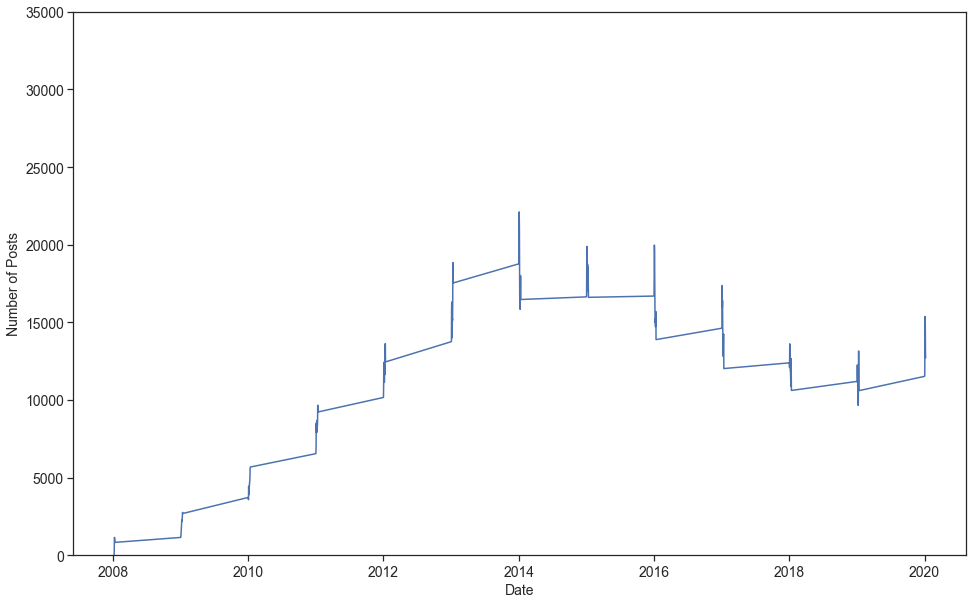

In [199]:

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound

### Chart Size Increase

To make our chart larger we can provide a width (16) and a height (10) as the figsize of the figure.

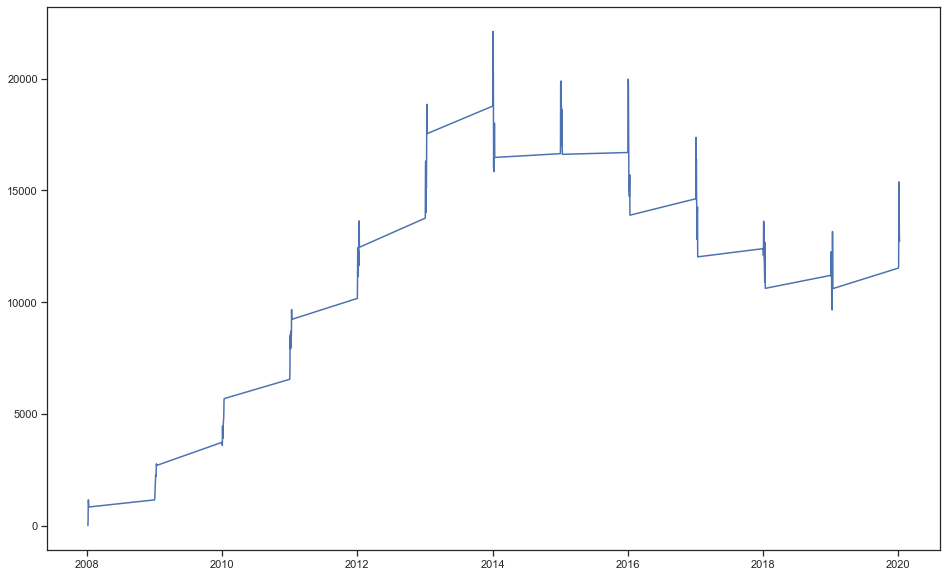

In [176]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

### Font Size Increase

This will make our chart easier to see. But when we increase the size of the chart, we should also increase the fontsize of the ticks on our axes so that they remain easy to read:

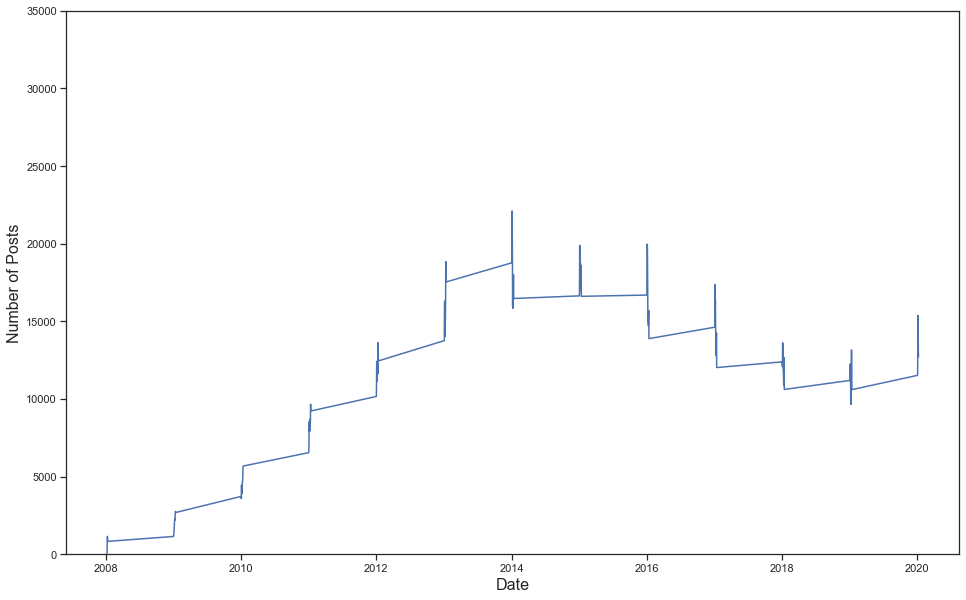

In [184]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

### Challenge


Now that you've successfully created and styled your chart, can you figure out how to plot both Java and Python next to each other? The result should look something like this:

### Dual Charts 

### Solution: Two Line Charts Next to Each Other

The trick is simply calling the .plot() method twice. That's all there is to it! =)

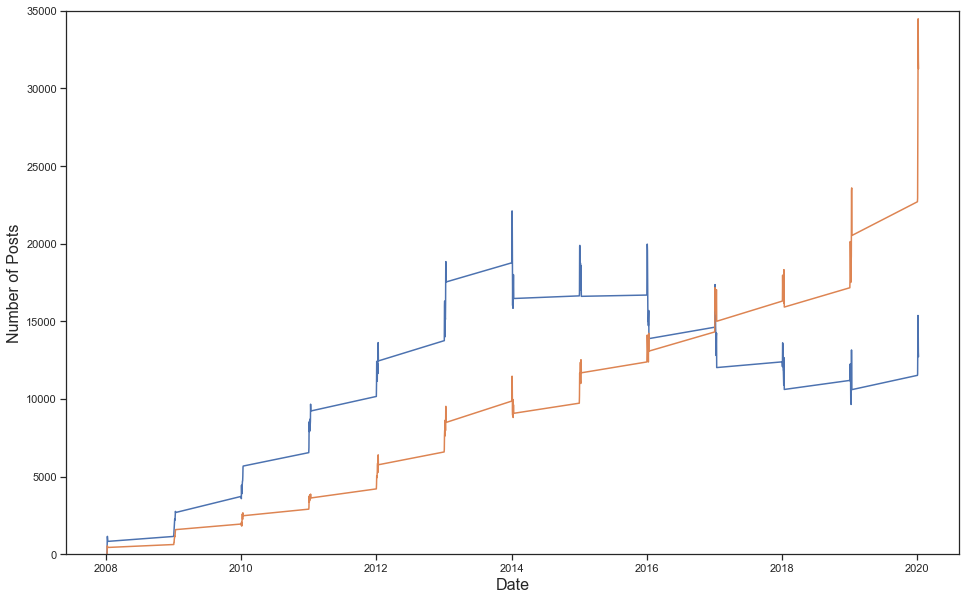

In [185]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java,reshaped_df.python)

### Multiple Charts 

But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:


This will allow us to iterate over each column in the DataFrame and plot it on our chart. The final result should look like this:

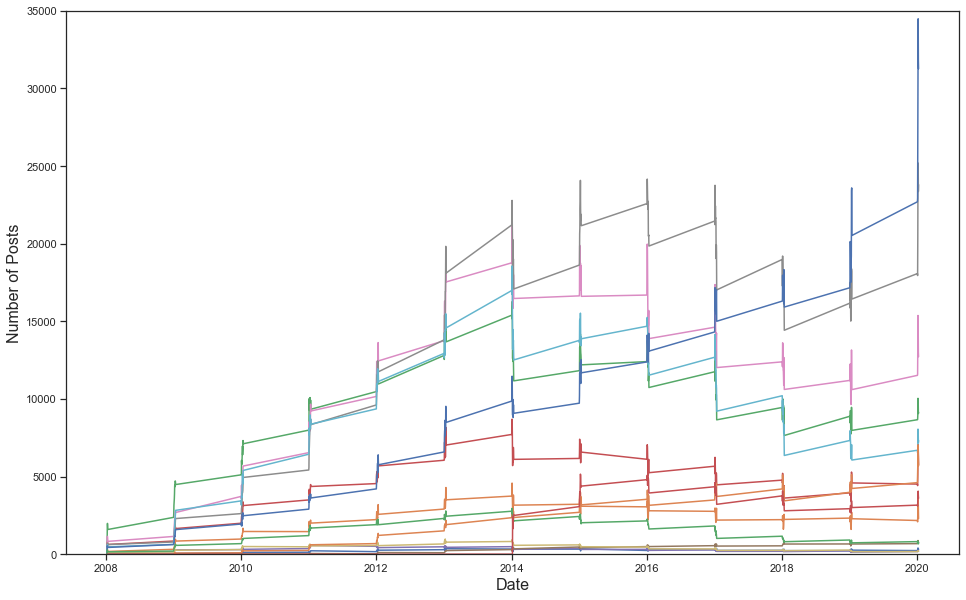

In [190]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

### Tag a color to Language 

But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language. Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth). Then let's add a legend to our chart:

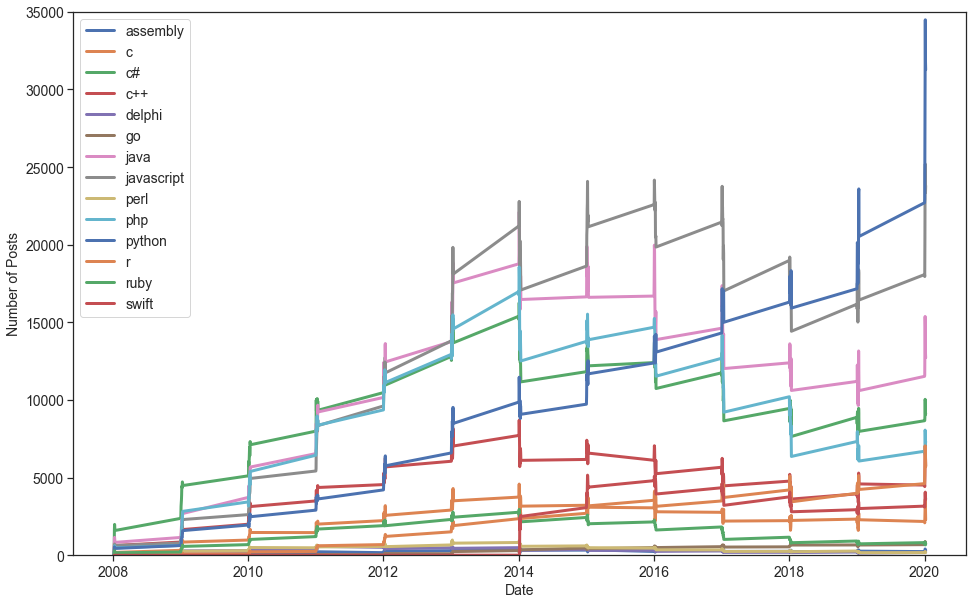

In [193]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=14) 

### Smoothing out Time-Series Data

#### Avoid Noisy in Time series data by rolling() and mean()

Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.


A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: rolling() and mean(). We can chain these two methods up to create a DataFrame made up of the averaged observations.

Play with the window argument (use 3 or 12) and see how the chart changes!

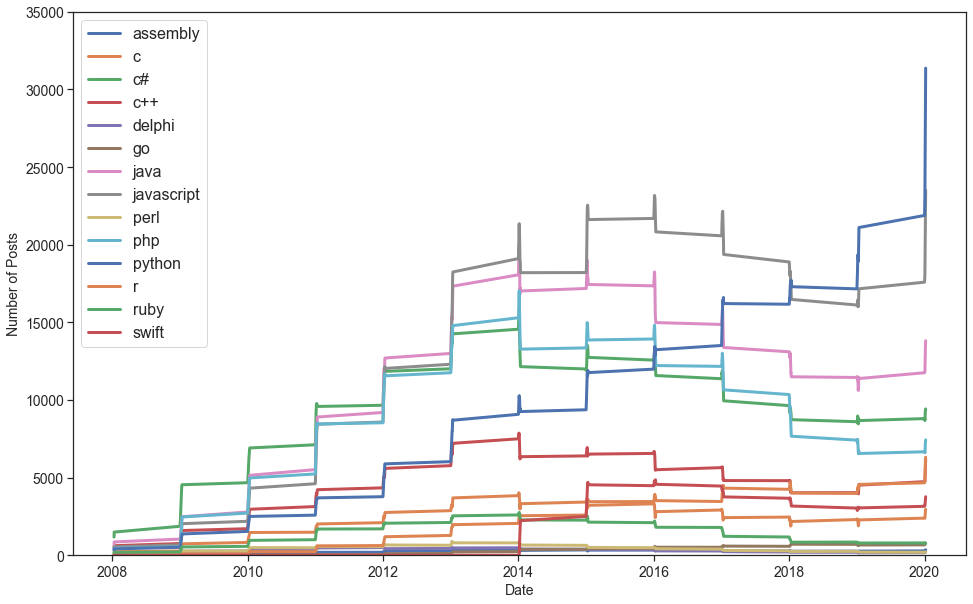

In [198]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=5).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
    
 
plt.legend(fontsize=16)


### What was the most popular programming language from 2008 to 2012?
C#

### What was the most popular programming language from 2015 to 2018?
Javascript 

### What was the most popular programming language in 2020?

Python 